In [1]:
import numpy as np
import math
import open3d as o3d
import cv2
import matplotlib.pyplot as plt
import copy

In [9]:
# depthImage[depthImage >= 812] = 812
# print(np.max(depthImage))
# depthImage = 255 - ((depthImage/812)*255)# Apply linear scaling to depthImage with darker regions further away
# plt.imshow(depthImage,cmap="gray")
# plt.show()

In [2]:
def displayImg(depthImage,colorImage):
    histCount, edge, tmp = plt.hist(depthImage.flatten(), bins=100)
    plt.show()
    plt.imshow(depthImage,cmap="Greys")
    plt.show()
    plt.imshow(colorImage)
    plt.show()

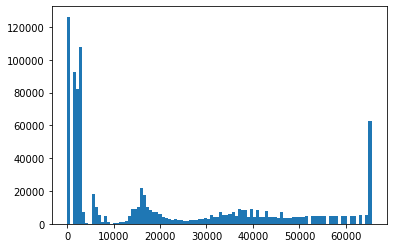

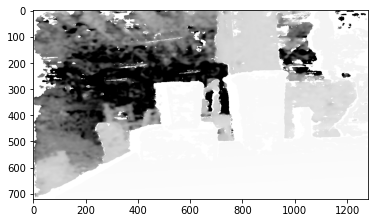

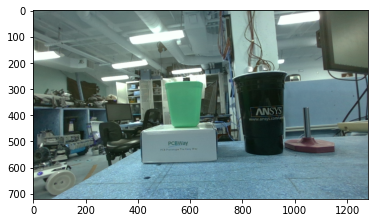

In [3]:
rawDepthImage = np.load("test-data/front/depthImage.npy")
colorImage = np.load("test-data/front/colorImage.npy")
depthImage = copy.deepcopy(rawDepthImage)

displayImg(depthImage,colorImage)

In [4]:
RGDB_Image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    o3d.geometry.Image(colorImage),
    o3d.geometry.Image(np.array(rawDepthImage).astype('uint16')),
    convert_rgb_to_intensity=False,
    depth_scale=1000.0)

PCD = o3d.geometry.PointCloud.create_from_rgbd_image(
    RGDB_Image,
    o3d.camera.PinholeCameraIntrinsic(320,240,320,240,160,120),
    project_valid_depth_only=True
)

o3d.visualization.draw([PCD])


In [ ]:
e